# Player data

In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [2]:
db = sqlite3.connect('../data/database.sqlite')

columns_from_attrs = ('id', 'player_api_id', 'player_fifa_api_id', 'date', 'potential')

player_df = pd.read_sql_query('SELECT * FROM Player', db, index_col='id')
player_atts = pd.read_sql_query('SELECT id, player_api_id, player_fifa_api_id,'
                                'date, overall_rating, potential  FROM Player_Attributes', db, index_col='id')
db.close()
print(f'Base df is of shape {player_df.shape}')
player_df.head()

Base df is of shape (11060, 6)


,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
id,,,,,,
1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [3]:
print(f'Attributes is of shape {player_atts.shape}')
player_atts.head()

Attributes is of shape (183978, 5)


,player_api_id,player_fifa_api_id,date,overall_rating,potential
id,,,,,
1,505942,218353,2016-02-18 00:00:00,67.0,71.0
2,505942,218353,2015-11-19 00:00:00,67.0,71.0
3,505942,218353,2015-09-21 00:00:00,62.0,66.0
4,505942,218353,2015-03-20 00:00:00,61.0,65.0
5,505942,218353,2007-02-22 00:00:00,61.0,65.0


In [4]:
player_df.player_api_id.value_counts()

163840    1
98997     1
94891     1
35500     1
115373    1
         ..
46412     1
26532     1
119839    1
23889     1
346111    1
Name: player_api_id, Length: 11060, dtype: int64

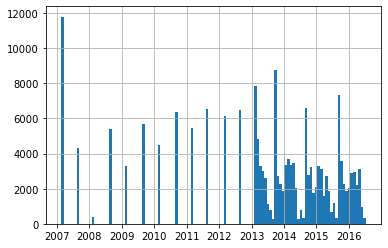

In [6]:
player_atts['date'] = pd.to_datetime(player_atts.date)
player_atts.date.hist(bins=(2017-2007)*12)
plt.show()

In [41]:
i=0
for player_id, g in player_atts.groupby([pd.Grouper(key='date', freq='1m')]):
    i+=1
    print(g.player_api_id.unique())
    if i==7: break

[505942 155782 162549 ...  36491  35506  39902]
[]
[]
[]
[]
[]
[30572 23780 27316 ... 36491 35506 39902]


,player_api_id,player_fifa_api_id,date,overall_rating,potential
0,2625,{148544},2013-03-08,"{58.0, 59.0, 60.0, 61.0, 63.0}","{64.0, 58.0, 61.0, 63.0}"
0,2625,{148544},2011-08-30,"{58.0, 59.0, 60.0, 61.0, 63.0}","{64.0, 58.0, 61.0, 63.0}"
0,2625,{148544},2007-02-22,"{58.0, 59.0, 60.0, 61.0, 63.0}","{64.0, 58.0, 61.0, 63.0}"
0,2625,{148544},2015-01-16,"{58.0, 59.0, 60.0, 61.0, 63.0}","{64.0, 58.0, 61.0, 63.0}"
0,2625,{148544},2012-02-22,"{58.0, 59.0, 60.0, 61.0, 63.0}","{64.0, 58.0, 61.0, 63.0}"


Second one has duplicates, drop them

In [8]:
player_atts.drop_duplicates('player_api_id',inplace=True)
print(f'Attributes is of shape {player_atts.shape}')

Attributes is of shape (11060, 42)


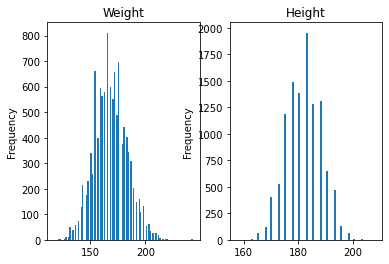

In [18]:
plt.subplot(121)
player_df.weight.plot.hist(title='Weight', bins=100)
plt.subplot(122)
player_df.height.plot.hist(title='Height', bins=70)
plt.show()

In [6]:
player_atts.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [9]:
df = player_df.merge(player_atts,on='player_api_id', how='inner')

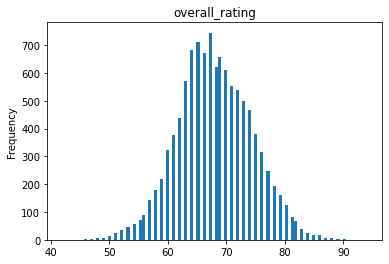

In [20]:
df.overall_rating.plot.hist(title='overall_rating', bins=100)
plt.show()

In [19]:
df.overall_rating.describe()

count    11060.000000
mean        67.961935
std          6.316694
min         42.000000
25%         64.000000
50%         68.000000
75%         72.000000
max         94.000000
Name: overall_rating, dtype: float64

In [30]:
stars = df[df.overall_rating >= 85]
print(f'There are {stars.shape[0]} football stars in the world')
stars.sort_values('overall_rating', ascending=False)[['player_name', 'overall_rating']]

There are 56 football stars in the world


,player_name,overall_rating
6169,Lionel Messi,94.0
1992,Cristiano Ronaldo,93.0
6369,Luis Suarez,90.0
6546,Manuel Neuer,90.0
7855,Neymar,90.0
11041,Zlatan Ibrahimovic,89.0
948,Arjen Robben,89.0
9025,Robert Lewandowski,88.0
10172,Thiago Silva,88.0
9659,Sergio Aguero,88.0


In [32]:
stars.dtypes

id_x                      int64
player_api_id             int64
player_name              object
player_fifa_api_id_x      int64
birthday                 object
height                  float64
weight                    int64
id_y                      int64
player_fifa_api_id_y      int64
date                     object
overall_rating          float64
potential               float64
preferred_foot           object
attacking_work_rate      object
defensive_work_rate      object
crossing                float64
finishing               float64
heading_accuracy        float64
short_passing           float64
volleys                 float64
dribbling               float64
curve                   float64
free_kick_accuracy      float64
long_passing            float64
ball_control            float64
acceleration            float64
sprint_speed            float64
agility                 float64
reactions               float64
balance                 float64
shot_power              float64
jumping 

In [37]:
player_atts.player_fifa_api_id.value_counts().max()

1